In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from random import randrange
import time

a) En cuanto a la incidencia en elegir una de las dos opciones en el tiempo que demora resolver el problema, se plantea la hipótesis de que by_row_sum se demora menos que by_col_sum. Esto es así debido a la forma en la que se almacena la información de las matrices. Suponiendo que se tiene una matriz $A$ de tamaño $A[n, n]$, esta se almacena en la memoria secundaria por filas. Esto significa que, para acceder a una columna, es necesario acceder a la posición de esa columna para cada fila. Sin embargo, para obtener una fila, se accede simplemente a ese espacio de memoria que almacena la fila (en el caso de que una fila $n$ quepa "entera" en la memoria caché de espacio $B$, $n \leq B$. En el caso de que $n>B$, se deberá acceder más de una vez para obtener la fila completa).

Por lo tanto, se tiene la hipótesis de que generar una suma por columnas es más lento a que una suma por filas.


b) Formalice su hipótesis en un análisis asintótico de la cantidad de accesos a la memoria externa, en función del tamaño n del input y del tamaño B de una página del caché.

Se consideran dos matrices $A, B$ a sumar, ambas de dimensión n, y la suma de ambas, que resulta en una matriz $C$ de la misma dimensión. Como se explicó en la parte anterior, estas se almacenan en memoria secundaria por filas.

La cantidad de accesos a memoria, para acceder a una fila, depende de la relación de su tamaño con $B$. Si $n \leq B$, se accede una vez. En el caso contrario, se accede la cantidad de veces hasta leer toda la fila. Formalmente,

$$
lecturas por fila = \lceil \frac{n}{B} \rceil
$$

Por otro lado, para acceder a una columna es necesario acceder a todas las filas para obtener el valor correspondiente a la columna deseada. Es decir,

$$
lecturas por columna = n
$$

En el caso de by_row_sum, se debe acceder a cada posición de cada fila en ambas matrices, para generar la suma entre esta misma posición. Es decir, si deseamos sumar por fila de la siguiente forma:

$$
a_{(n,n)}+b_{(n,n)}=c_{(n,n)}
$$

se tiene que el costo de acceder a una fila es de $\lceil \frac{n}{B} \rceil $. Por lo tanto, el costo de acceder a todas las filas de ambas matrices y escribirlas en una nueva matriz es de 
$$
costo(byrowsum) = 2 \cdot n \cdot \lceil \frac{n}{B} \rceil + \lceil \frac{n}{B} \rceil \in O(n)
$$

Por otro lado, en el caso de by_col_sum, cada vez que se quiere acceder a una posición de una columna en específico, es necesario acceder primero a la fila donde se encuentra esta posición. Por lo tanto, el costo para acceder a una columna es de $n$. Esto indica que para acceder a todas las columnas de ambas matrices y escribirlas en una nueva matriz, se tiene
$$
costo(bycolsum)= 2 \cdot n \cdot \lceil \frac{n}{B} \rceil \cdot n + n \cdot \lceil \frac{n}{B} \rceil \in O(n^2 \cdot \lceil \frac{n}{B} \rceil)
$$




In [2]:
# c)
def by_row_sum(A, B):
  n = len(A)
  C = np.zeros((n,n))
  for i in range(0,n):
    for j in range(0,n):
      C[i][j] = A[i][j] + B[i][j]
  return C

def by_col_sum(A, B):
  n = len(A)
  C = np.zeros((n,n))
  for j in range(0,n):
    for i in range(0,n):
      C[i][j] = A[i][j] + B[i][j]
  return C

3
1
2
3
4
5
6
7
8
9
10
4
1
2
3
4
5
6
7
8
9
10
5
1
2
3
4
5
6
7
8
9
10
6
1
2
3
4
5
6
7
8
9
10
7
1
2
3
4
5
6
7
8
9
10
8
1
2
3
4
5
6
7
8
9
10
9
1
2
3
4
5
6
7
8
9
10
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
12
1
2
3
4
5
6
7
8
9
10
13
1
2
3
4
5
6
7
8
9
10
14
1
2
3
4
5
6
7
8
9
10


AttributeError: ignored

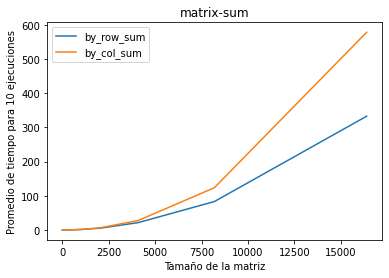

In [3]:
suma_tiempos1=0
suma_tiempos2=0
fun_1_results=[]
fun_2_results=[]
for i in range(3,15):
  print(i)
  for j in range(1,11):
    print(j)
    M1 = np.random.randint(256, size=(2**i,2**i))
    M2 = np.random.randint(256, size=(2**i,2**i))
    inicial=time.time()
    M3 = by_row_sum(M1,M2)
    final=time.time()
    suma_tiempos1+=(final-inicial)
    inicial=time.time()
    M3 = by_col_sum(M1,M2)
    final=time.time()
    suma_tiempos2+=(final-inicial)
  promedio1=suma_tiempos1/10
  promedio2=suma_tiempos2/10
  fun_1_results.append(promedio1)
  fun_2_results.append(promedio2)

# d)
x_values=[]
for i in range(3,15):
  x_values.append(2**i)

fig = plt.figure()
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Promedio de tiempo para 10 ejecuciones')
plt.plot(x_values, fun_1_results, '-', label='by_row_sum')
plt.plot(x_values, fun_2_results, '-', label='by_col_sum')
plt.title('matrix-sum')
plt.legend()
plt.savefile('matrix-sum.jpg', dpi=400)
plt.show()

e) Analice sus resultados y evalúe si su hipótesis se cumplió y a qué se debió el hecho de cumplirse, o no. En particular, si observa diferencias en el comportamiento de las estrategias, intente identificar a partir de qué tamaño de entrada ocurre y por qué sucede.

En base a los cálculos hechos en la parte $c$ y los resultados plasmados en la parte $d$, se puede ver que la hipótesis propuesta en la parte $a$ y $b$ se cumple. Esto se ve gráficamente, donde la curva azul indica el tiempo utilizado en la suma por filas. Se puede observar que, aproximadamente, desde el tamaño de matriz $2^{12}$, la suma por columna utiliza más tiempo que la por fila. 